In [1]:
import numpy as np
import pandas as pd
import pickle as pk
from matplotlib import pyplot as plt
import matplotlib as mpl
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
%matplotlib inline
mpl.rc('font',size=21,**{'family':'sans-serif','sans-serif':['Arial']})

In [2]:
wd = '/Volumes/eSSD0/Papers/GRL_G1RF/data/'
compsets = ['F1850CN','piClim-abrupt-4xCO2','piClim-abrupt-SOLr','piClim-G1']

ta = {}
cl = {}
for i in range(len(compsets)):  
    ta[compsets[i]] = pk.load(open(wd+'interpolated/F_'+compsets[i]+'_diag_grid_int.pi','rb'))['ta_int']

trop1 = np.linspace(300,100,23)
trop2 = np.linspace(100,300,23)
trop = np.concatenate((trop1,trop2))
trop_full = np.tile(trop[None,:],(17,1))

cmip_plevs = np.asarray([10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000])
plevs = np.tile(cmip_plevs[:,None],(1,46))

sol = {}
x4 = {}
g1 = {}
g1l = {}
resid = {}

verts = (0,3)

sol = np.nanmean(ta['piClim-abrupt-SOLr']-ta['F1850CN'],axis=verts)
x4 = np.nanmean(ta['piClim-abrupt-4xCO2']-ta['F1850CN'],axis=verts)
g1 = np.nanmean(ta['piClim-G1']-ta['F1850CN'],axis=verts)

g1l = sol+x4
resid = g1-g1l

In [3]:
lat = np.linspace(-90,90,46)
lon = np.linspace(0,355,72)
cmip_plevs = np.asarray([10, 20, 30, 50, 70, 100, 150, 200, 250, 300, 400, 500, 600, 700, 850, 925, 1000])

y = lat*np.pi/180
coslat = np.cos(y)
coslat = np.tile(coslat,(lon.size,1)).T

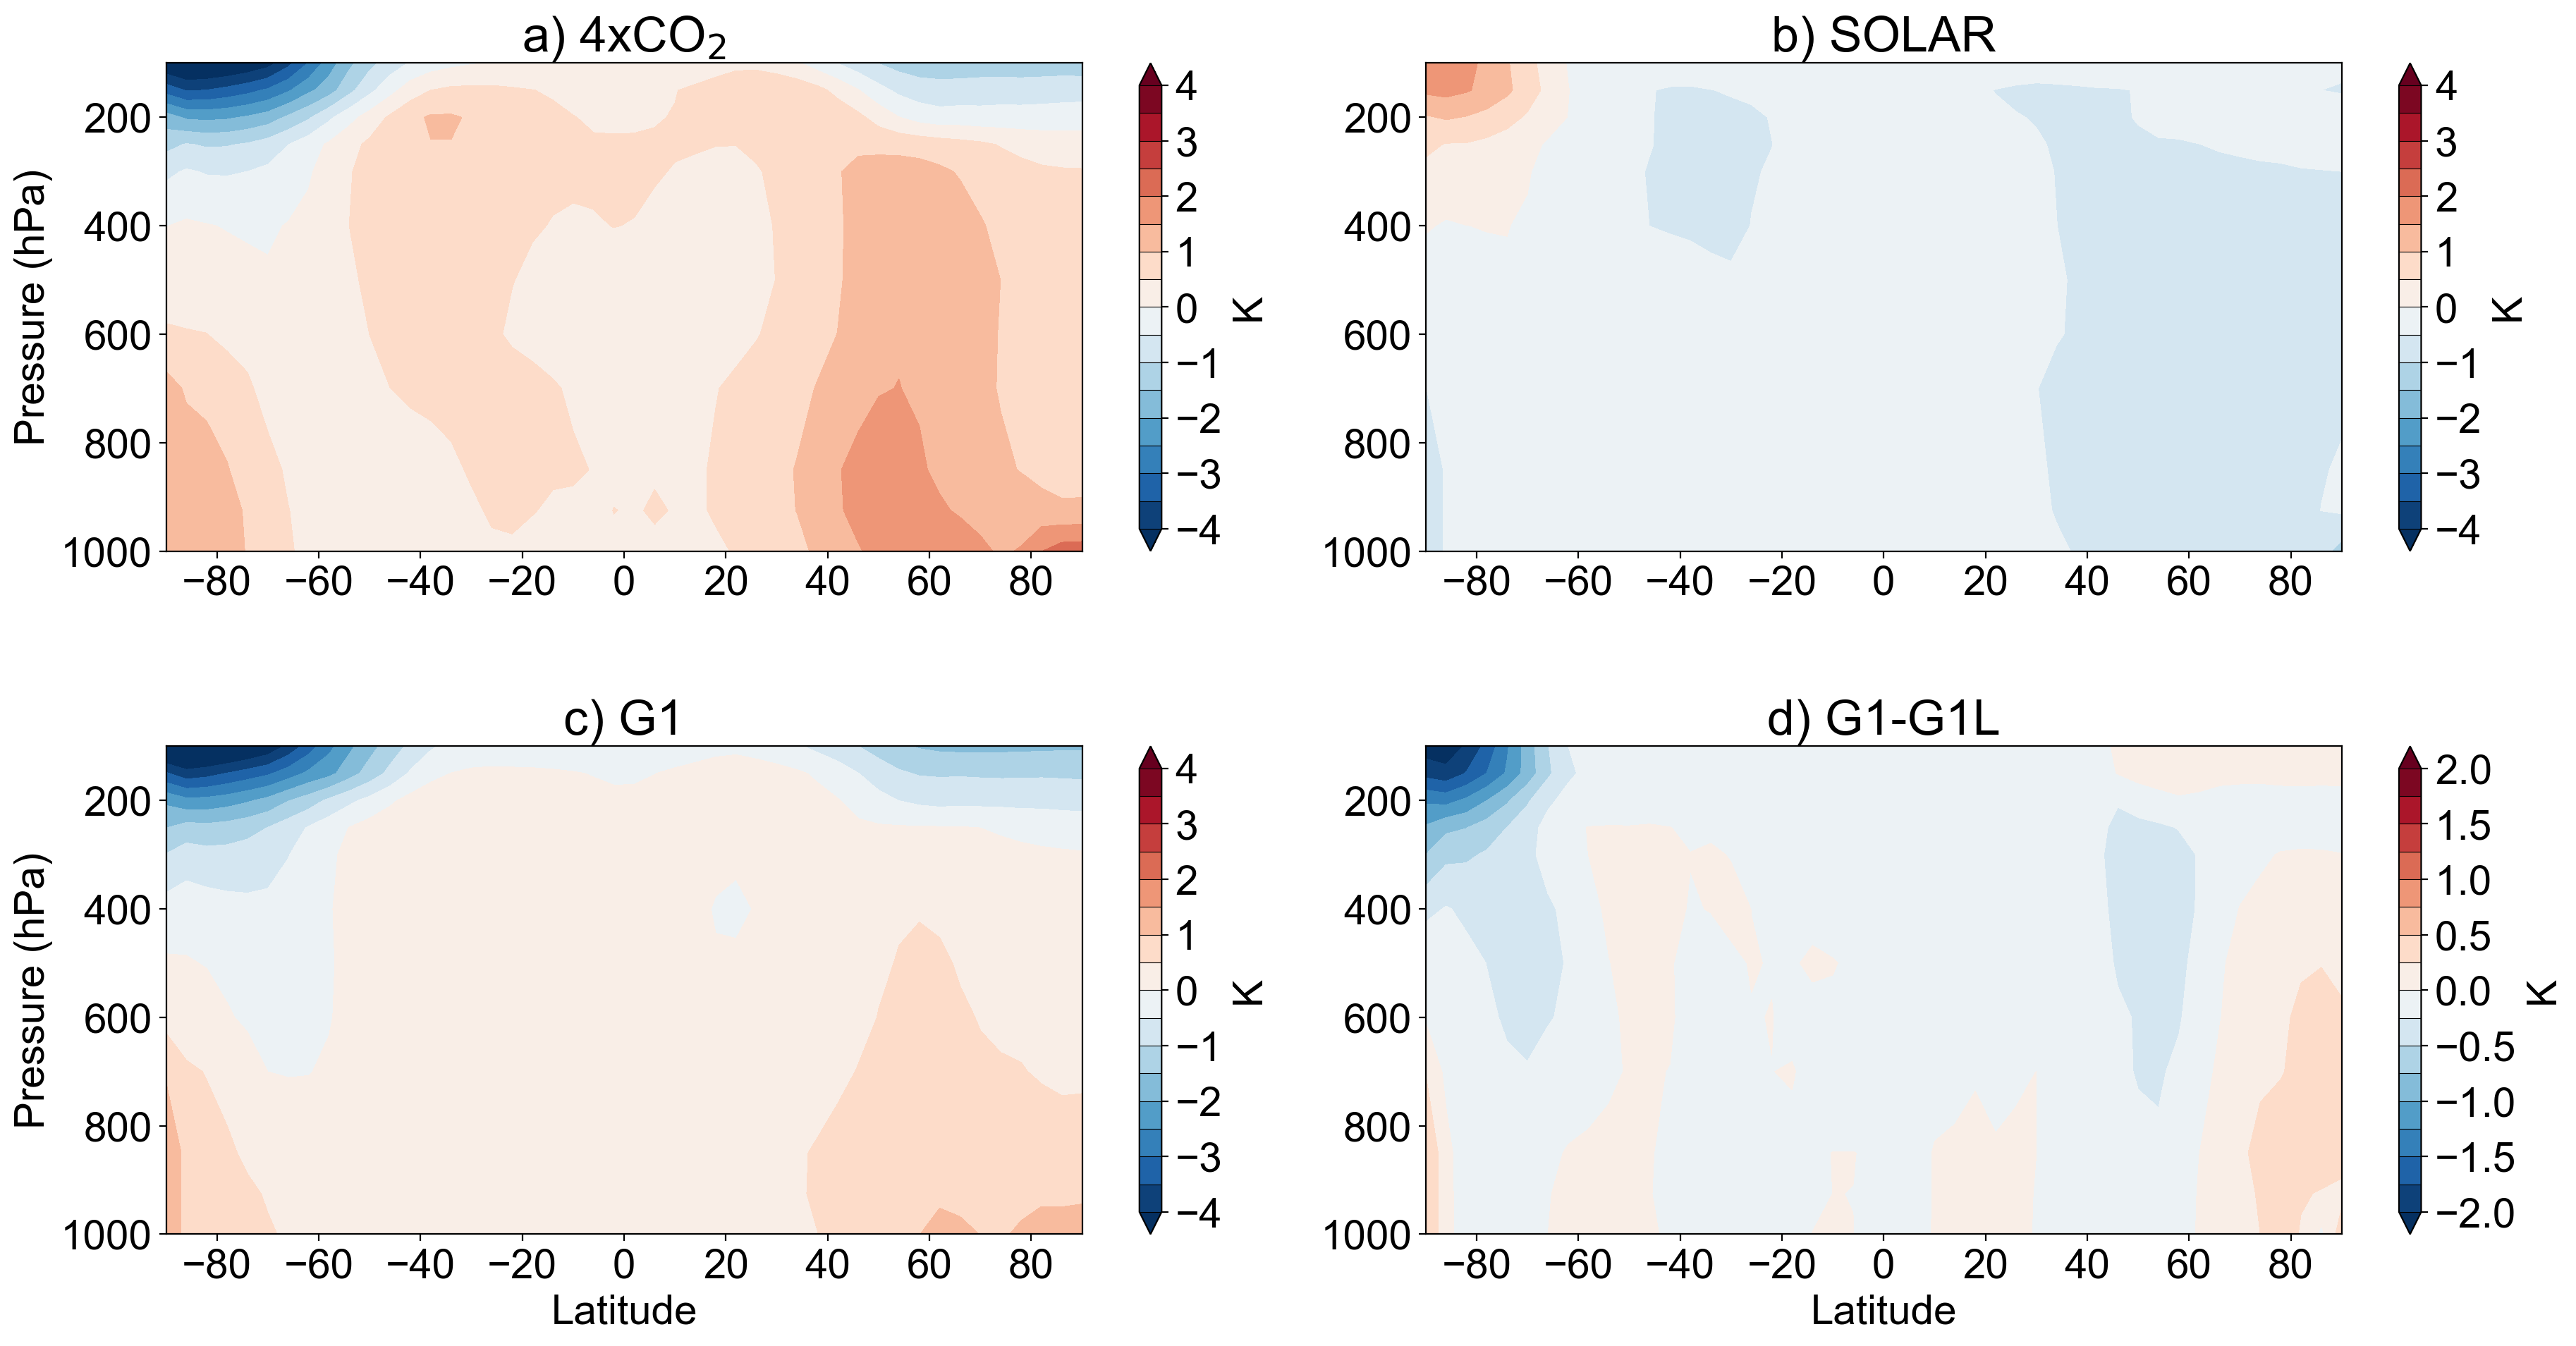

In [4]:
plt.figure(figsize=(22,11),dpi=200)

plt.subplot(221)
plt.title('a) 4xCO$_{2}$')
cont1 = plt.contourf(lat,cmip_plevs[5:],x4[5:,:],np.arange(-4,4.1,0.5),cmap=plt.cm.RdBu_r,extend='both')
plt.gca().invert_yaxis()
plt.colorbar(cont1,drawedges='True',label='K')
plt.xticks(ticks=[-80,-60,-40,-20,0,20,40,60,80])
plt.ylabel('Pressure (hPa)')

plt.subplot(222)
plt.title('b) SOLAR')
cont2 = plt.contourf(lat,cmip_plevs[5:],sol[5:,:],np.arange(-4,4.1,0.5),cmap=plt.cm.RdBu_r,extend='both')
plt.gca().invert_yaxis()
plt.colorbar(cont2,drawedges='True',label='K')
plt.xticks(ticks=[-80,-60,-40,-20,0,20,40,60,80])

#CLOUDS
plt.subplot(223)
plt.title('c) G1')
cont3 = plt.contourf(lat,cmip_plevs[5:],g1[5:,:],np.arange(-4,4.1,0.5),cmap=plt.cm.RdBu_r,extend='both')
plt.gca().invert_yaxis()
plt.colorbar(cont3,drawedges='True',label='K')
plt.xticks(ticks=[-80,-60,-40,-20,0,20,40,60,80])
plt.xlabel('Latitude')
plt.ylabel('Pressure (hPa)')

plt.subplot(224)
plt.title('d) G1-G1L')
cont4 = plt.contourf(lat,cmip_plevs[5:],resid[5:,:],np.arange(-2,2.1,0.25),cmap=plt.cm.RdBu_r,extend='both')
plt.gca().invert_yaxis()
plt.colorbar(cont4,drawedges='True',label='K')
plt.xticks(ticks=[-80,-60,-40,-20,0,20,40,60,80])
plt.xlabel('Latitude')
plt.subplots_adjust(wspace=0.1,hspace=0.4)

plt.savefig('TA_ZM.png',bbox_inches='tight')